In [0]:
# ライブラリのインストール
%pip install wordcloud==1.5
%pip install bert-extractive-summarizer
%pip install sentencepiece

Python interpreter will be restarted.
Requirement already satisfied: wordcloud==1.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (1.5.0)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from wordcloud==1.5) (8.0.1)
Requirement already satisfied: numpy>=1.6.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from wordcloud==1.5) (1.19.2)
Python interpreter will be restarted.
Python interpreter will be restarted.
Requirement already satisfied: bert-extractive-summarizer in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (0.7.1)
Requirement already satisfied: spacy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from bert-extractive-summarizer) (3.0.6)
Requirement already satisfied: transformers in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from bert-extractive-summarizer) (4.6.1)
Requirement already satisfied: scikit-learn in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from bert-extractive-summarizer) (0.23.2)
Requirement already satisfied: jinja2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (2.11.2)
Requirement already satisfied: spacy-legacy<3.1.0,>=3.0.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (3.0.5)
Requirement already satisfied: preshed<3.1.0,>=3.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (3.0.5)
Requirement already satisfied: typer<0.4.0,>=0.3.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (0.3.2)
Requirement already satisfied: cymem<2.1.0,>=2.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (2.0.5)
Requirement already satisfied: catalogue<2.1.0,>=2.0.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (2.0.4)
Requirement already satisfied: thinc<8.1.0,>=8.0.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (8.0.3)
Requirement already satisfied: srsly<3.0.0,>=2.4.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (2.4.1)
Requirement already satisfied: pathy>=0.3.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (0.5.2)
Requirement already satisfied: requests<3.0.0,>=2.13.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (2.24.0)
Requirement already satisfied: setuptools in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (50.3.1.post20201107)
Requirement already satisfied: packaging>=20.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b890fa74-0977-455c-9ccf-6ff2e853f601/lib/python3.8/site-packages (from spacy->bert-extractive-summarizer) (20.4)
Requirement already satisfied: murmurhash<1.1.0,>=0.28.0 in /lo

# 自然言語処理を用いたCORD-19データセットの探索
### COVID-19 Open Research Dataset Challenge (CORD-19) 作業用ノートブック

このノートブックは、CORD-19データセットの分析を容易に始められるようにするための、 [COVID-19 Open Research Dataset Challenge (CORD-19)](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) に対する作業用ノートブックです。  

<img src="https://miro.medium.com/max/3648/1*596Ur1UdO-fzQsaiGPrNQg.png" width="900"/>

アトリビューション:
* このノートブックで使用されるデータセットのライセンスは、[downloaded dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge/download)に含まれるメタデータcsvに記載されています。
* 2020-03-03のデータセットには以下が含まれています。
  * `comm_use_subset`: 商用利用のサブセット (PMCコンテンツを含む) -- 9000 論文(内3論文は空), 186Mb
  * `noncomm_use_subset`: 非商用利用のサブセット (PMCコンテンツを含む) -- 1973 論文(内1論文は空), 36Mb
  * `biorxiov_medrxiv`: bioRxiv/medRxiv サブセット (ピアレビューされていない準備稿) -- 803 論文, 13Mb
* DatabricksあるいはDatabricksコミュニティエディションを使用する際には、`/databricks-datasets/COVID/CORD-19`からデータセットのコピーを利用できます。
* このノートブックは[CC BY 3.0](https://creativecommons.org/licenses/by/3.0/us/)のライセンスの下で共有することができます。

> **注意**<br>
> このノートブックを実行する前に「1. JSONデータセットの読み込み」を実行して、ファイルを準備してください。

In [0]:
# ユーザーごとに一意のパスになるようにユーザー名をパスに含めます
import re
from pyspark.sql.types import * 

# Username を取得
username_raw = dbutils.notebook.entry_point.getDbutils().notebook().getContext().tags().apply('user')
# Username の英数字以外を除去し、全て小文字化。Username をファイルパスやデータベース名の一部で使用可能にするため。
username = re.sub('[^A-Za-z0-9]+', '', username_raw).lower()

print(username)

takaakiyayoidatabrickscom

## Parquetパス変数の設定

`/tmp/<ユーザー名>/COVID/CORD-19/2020-03-13/`にParquetフォーマットで保存されています。

In [0]:
# PythonにおけるPathの設定
comm_use_subset_pq_path = f"/tmp/{username}/COVID/CORD-19/2020-03-13/comm_use_subset.parquet"
noncomm_use_subset_pq_path = f"/tmp/{username}/COVID/CORD-19/2020-03-13/noncomm_use_subset.parquet"
biorxiv_medrxiv_pq_path = f"/tmp/{username}/COVID/CORD-19/2020-03-13/biorxiv_medrxiv/biorxiv_medrxiv.parquet"

## Parquetファイルの読み込み

In [0]:
comm_use_subset = spark.read.format("parquet").load(comm_use_subset_pq_path)
noncomm_use_subset = spark.read.format("parquet").load(noncomm_use_subset_pq_path)
biorxiv_medrxiv = spark.read.format("parquet").load(biorxiv_medrxiv_pq_path)

In [0]:
# レコード数のカウント
comm_use_subset_cnt = comm_use_subset.count()
noncomm_use_subset_cnt = noncomm_use_subset.count()
biorxiv_medrxiv_cnt = biorxiv_medrxiv.count()

# 出力
print (f"comm_use_subset: {comm_use_subset_cnt}, noncomm_use_subset: {noncomm_use_subset_cnt}, biorxiv_medrxiv: {biorxiv_medrxiv_cnt}")

comm_use_subset: 8997, noncomm_use_subset: 1972, biorxiv_medrxiv: 803

In [0]:
comm_use_subset.show(3)

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
 abstract| back_matter| bib_entries| body_text| metadata| paper_id| ref_entries|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
[{[], [], Abstrac...|[{[], [], Acknowl...|{{[{D, Baxby, [],...|[{[{90, BIBREF0, ...|{[{{Ree Park-Safa...|9a9f30acc275c64c0...|{{null, , while e...|
[{[], [], Abstrac...|[{[], [], ACKNOWL...|{{[], , {null, nu...|[{[], [], INTRODU...|{[{{null, null, n...|2b4696bf4bc923a13...|{{null, Growth of...|
 []|[{[], [], AUTHOR ...|{{[{C, Alarcon, [...|[{[{320, BIBREF4,...|{[{{null, null, n...|14723bfc42908c3f8...|{{null, miR-21a-5...|
+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
only showing top 3 rows

In [0]:
comm_use_subset.printSchema()

root
-- abstract: array (nullable = true)
 |-- element: struct (containsNull = true)
 | |-- cite_spans: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- end: long (nullable = true)
 | | | |-- ref_id: string (nullable = true)
 | | | |-- start: long (nullable = true)
 | | | |-- text: string (nullable = true)
 | |-- ref_spans: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- end: long (nullable = true)
 | | | |-- ref_id: string (nullable = true)
 | | | |-- start: long (nullable = true)
 | | | |-- text: string (nullable = true)
 | |-- section: string (nullable = true)
 | |-- text: string (nullable = true)
-- back_matter: array (nullable = true)
 |-- element: struct (containsNull = true)
 | |-- cite_spans: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- end: long (nullable = true)
 | | | |-- ref_id: string (nullable = true)
 | | | |-- start: long (nullable = true)
 | | | |-- text: string (nullable = true)
 | |-- ref_spans: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- end: long (nullable = true)
 | | | |-- ref_id: string (nullable = true)
 | | | |-- start: long (nullable = true)
 | | | |-- text: string (nullable = true)
 | |-- section: string (nullable = true)
 | |-- text: string (nullable = true)
-- bib_entries: struct (nullable = true)
 |-- BIBREF0: struct (nullable = true)
 | |-- authors: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- first: string (nullable = true)
 | | | |-- last: string (nullable = true)
 | | | |-- middle: array (nullable = true)
 | | | | |-- element: string (containsNull = true)
 | | | |-- suffix: string (nullable = true)
 | |-- issn: string (nullable = true)
 | |-- other_ids: struct (nullable = true)
 | | |-- DOI: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMCID: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMID: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | |-- pages: string (nullable = true)
 | |-- ref_id: string (nullable = true)
 | |-- title: string (nullable = true)
 | |-- venue: string (nullable = true)
 | |-- volume: string (nullable = true)
 | |-- year: long (nullable = true)
 |-- BIBREF1: struct (nullable = true)
 | |-- authors: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- first: string (nullable = true)
 | | | |-- last: string (nullable = true)
 | | | |-- middle: array (nullable = true)
 | | | | |-- element: string (containsNull = true)
 | | | |-- suffix: string (nullable = true)
 | |-- issn: string (nullable = true)
 | |-- other_ids: struct (nullable = true)
 | | |-- DOI: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMCID: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMID: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- arXiv: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | |-- pages: string (nullable = true)
 | |-- ref_id: string (nullable = true)
 | |-- title: string (nullable = true)
 | |-- venue: string (nullable = true)
 | |-- volume: string (nullable = true)
 | |-- year: long (nullable = true)
 |-- BIBREF10: struct (nullable = true)
 | |-- authors: array (nullable = true)
 | | |-- element: struct (containsNull = true)
 | | | |-- first: string (nullable = true)
 | | | |-- last: string (nullable = true)
 | | | |-- middle: array (nullable = true)
 | | | | |-- element: string (containsNull = true)
 | | | |-- suffix: string (nullable = true)
 | |-- issn: string (nullable = true)
 | |-- other_ids: struct (nullable = true)
 | | |-- DOI: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMCID: array (nullable = true)
 | | | |-- element: string (containsNull = true)
 | | |-- PMID: array (nullable = true)
 | | | |-- element: st

## すべてのタイトルからワードクラウドを作成してみましょう。

事前に`wordcloud==1.5`をインストールしておく必要があります。

In [0]:
comm_use_subset.select("metadata.title").show(3)

+--------------------+
 title|
+--------------------+
Seasonal recurren...|
UniProt: a worldw...|
 |
+--------------------+
only showing top 3 rows

In [0]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

def wordcloud_draw(text, color = 'white'):
    """
    テキストからストップワードを削除した後にワードクラウドをプロットします
    """
    cleaned_word = " ".join([word for word in text.split()])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=1000,
                      height=1000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    display(plt.show())

In [0]:
from pyspark.sql.functions import concat_ws, collect_list

all_title_df = comm_use_subset.agg(concat_ws(", ", collect_list(comm_use_subset['metadata.title'])).alias('all_titles'))
display(all_title_df)

all_titles


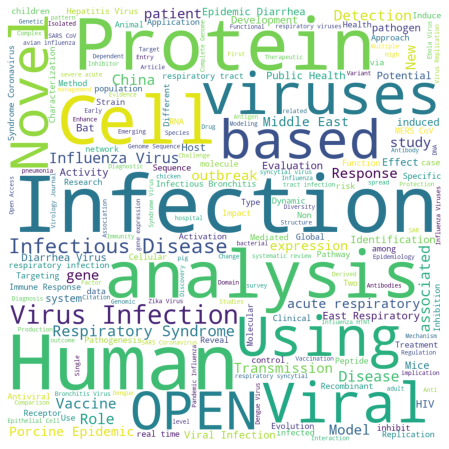

In [0]:
wordcloud_draw(str(all_title_df.select('all_titles').collect()[0]))

### ラウンド 2 - 意味のないキーワードの除外

In [0]:
def custom_wordcloud_draw(text, color = 'white'):
    """
    テキストからストップワードを削除した後にワードクラウドをプロットします
    """
    cleaned_word = " ".join([word for word in text.split()])
    wordcloud = WordCloud(stopwords= STOPWORDS.update(['using', 'based', 'analysis', 'study', 'research', 'viruses']),
                      background_color=color,
                      width=1000,
                      height=1000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    display(plt.show())

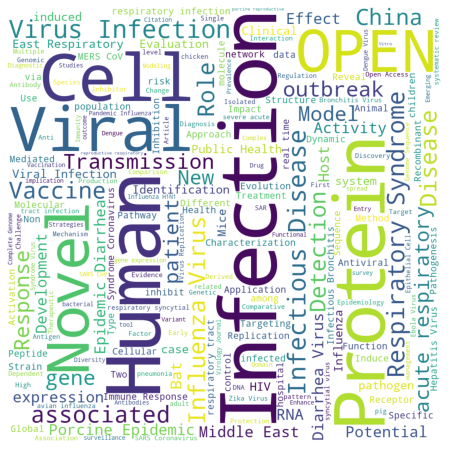

In [0]:
custom_wordcloud_draw(str(all_title_df.select('all_titles').collect()[0]))

## アブストラクトのサマリーを作成

次に、講義の要約に使用されたBERTでトレーニングされたsummarizerを使用します。

詳細に関してはこちらの[論文](https://arxiv.org/abs/1906.04165)を参照してください。

ライブラリーを使うには、PyPiによる`bert-extractive-summarizer`のインストールが必要です。

[bert\-extractive\-summarizer · PyPI](https://pypi.org/project/bert-extractive-summarizer/)

In [0]:
from summarizer import Summarizer

# 最初のアブストラクトを取得
abstract1 = str(comm_use_subset.select("abstract.text").first())
abstract1

Out[13]: "Row(text=['Cowpox virus infections in captive cheetahs (Acinonyx jubatus) with high morbidity and mortality have already been reported in the UK and Russia in the 1970s. However, most of the reported cases have been singular events. Here, we report a total of five cowpox virus outbreaks in cheetahs in the same safari park in Denmark between 2010 and 2014. Nine cheetahs showed varying severity of clinical disease; two of them died (22%). All episodes occurred between August and October of the respective year. No other carnivores kept at the same institution nor the keepers taking care of the animals were clinically affected. The clinical picture of cowpox was confirmed by extensive laboratory investigations including histopathological and molecular analyses as well as cell culture isolation of a cowpox virus. High anti-orthopoxvirus antibody titers were detected in all 9 diseased cheetahs compared to seven contact cheetahs without clinical signs and 13 cheetahs not in direct contact. Additionally, whole genome sequencing from one sample of each cluster with subsequent phylogenetic analysis showed that the viruses from different outbreaks have individual sequences but clearly form a clade distinct from other cowpox viruses. However, the intra-clade distances are still larger than those usually observed within clades of one event. These findings indicate multiple and separate introductions of cowpox virus, probably from wild rodent populations, where the virus keeps circulating naturally and is only sporadically introduced into the cheetahs. Sero-positivity of voles (Arvicola amphibious) caught in zoo grounds strengthens this hypothesis. As a consequence, recommendations are given for medical and physical management of diseased cheetahs, for hygienic measures as well as for pre-shipment isolation before cheetah export from zoo grounds.'])"

In [0]:
abstract2 = str(comm_use_subset.select("abstract.text").take(2)[1])
abstract2

Out[14]: "Row(text=['The UniProt Knowledgebase is a collection of sequences and annotations for over 120 million proteins across all branches of life. Detailed annotations extracted from the literature by expert curators have been collected for over half a million of these proteins. These annotations are supplemented by annotations provided by rule based automated systems, and those imported from other resources. In this article we describe significant updates that we have made over the last 2 years to the resource. We have greatly expanded the number of Reference Proteomes that we provide and in particular we have focussed on improving the number of viral Reference Proteomes. The UniProt website has been augmented with new data visualizations for the subcellular localization of proteins as well as their structure and interactions. UniProt resources are available under a CC-BY (4.0) license via the web at https://www.uniprot.org/.'])"

### `min_length`パラメーターを用いたSummarizerモデルのトレーニング

トレーニングはMLflowによってトラッキングされます。右上の**Experiment**をクリックしてみて下さい。

In [0]:
model = Summarizer()
abstract1_summary = model(str(abstract1), min_length=20)

full_abstract1 = ''.join(abstract1_summary)
print(full_abstract1)

Downloading: 0%| | 0.00/571 [00:00<?, ?B/s]Downloading: 100%|██████████| 571/571 [00:00<00:00, 554kB/s]
Downloading: 0%| | 0.00/1.34G [00:00<?, ?B/s]Downloading: 0%| | 3.26M/1.34G [00:00<00:41, 32.2MB/s]Downloading: 1%| | 7.27M/1.34G [00:00<00:39, 34.2MB/s]Downloading: 1%| | 13.1M/1.34G [00:00<00:34, 39.1MB/s]Downloading: 1%|▏ | 18.1M/1.34G [00:00<00:31, 41.6MB/s]Downloading: 2%|▏ | 23.4M/1.34G [00:00<00:29, 44.6MB/s]Downloading: 2%|▏ | 28.6M/1.34G [00:00<00:28, 46.5MB/s]Downloading: 2%|▏ | 33.4M/1.34G [00:00<00:27, 46.9MB/s]Downloading: 3%|▎ | 39.2M/1.34G [00:00<00:26, 49.6MB/s]Downloading: 3%|▎ | 44.2M/1.34G [00:00<00:26, 49.7MB/s]Downloading: 4%|▎ | 50.2M/1.34G [00:01<00:24, 52.6MB/s]Downloading: 4%|▍ | 56.4M/1.34G [00:01<00:23, 55.0MB/s]Downloading: 5%|▍ | 62.6M/1.34G [00:01<00:22, 56.8MB/s]Downloading: 5%|▌ | 68.8M/1.34G [00:01<00:21, 58.3MB/s]Downloading: 6%|▌ | 75.0M/1.34G [00:01<00:21, 59.4MB/s]Downloading: 6%|▌ | 81.4M/1.34G [00:01<00:20, 60.6MB/s]Downloading: 7%|▋ | 87.7M/1.34G [00:01<00:20, 61.5MB/s]Downloading: 7%|▋ | 93.9M/1.34G [00:01<00:20, 61.5MB/s]Downloading: 7%|▋ | 100M/1.34G [00:01<00:20, 61.8MB/s] Downloading: 8%|▊ | 106M/1.34G [00:01<00:19, 62.2MB/s]Downloading: 8%|▊ | 113M/1.34G [00:02<00:19, 62.8MB/s]Downloading: 9%|▉ | 119M/1.34G [00:02<00:19, 63.0MB/s]Downloading: 9%|▉ | 126M/1.34G [00:02<00:21, 57.0MB/s]Downloading: 10%|▉ | 131M/1.34G [00:02<00:21, 57.4MB/s]Downloading: 10%|█ | 137M/1.34G [00:02<00:22, 53.1MB/s]Downloading: 11%|█ | 143M/1.34G [00:02<00:21, 55.7MB/s]Downloading: 11%|█ | 150M/1.34G [00:02<00:20, 57.4MB/s]Downloading: 12%|█▏ | 156M/1.34G [00:02<00:20, 59.1MB/s]Downloading: 12%|█▏ | 162M/1.34G [00:02<00:19, 60.2MB/s]Downloading: 13%|█▎ | 169M/1.34G [00:02<00:19, 61.5MB/s]Downloading: 13%|█▎ | 175M/1.34G [00:03<00:18, 62.7MB/s]Downloading: 14%|█▎ | 182M/1.34G [00:03<00:18, 63.5MB/s]Downloading: 14%|█▍ | 188M/1.34G [00:03<00:19, 59.7MB/s]Downloading: 14%|█▍ | 194M/1.34G [00:03<00:20, 56.8MB/s]Downloading: 15%|█▍ | 200M/1.34G [00:03<00:21, 52.8MB/s]Downloading: 15%|█▌ | 206M/1.34G [00:03<00:20, 54.6MB/s]Downloading: 16%|█▌ | 212M/1.34G [00:03<00:20, 55.7MB/s]Downloading: 16%|█▌ | 218M/1.34G [00:03<00:19, 56.5MB/s]Downloading: 17%|█▋ | 223M/1.34G [00:03<00:19, 56.1MB/s]Downloading: 17%|█▋ | 230M/1.34G [00:04<00:19, 57.6MB/s]Downloading: 17%|█▋ | 235M/1.34G [00:04<00:22, 48.5MB/s]Downloading: 18%|█▊ | 241M/1.34G [00:04<00:21, 51.9MB/s]Downloading: 18%|█▊ | 247M/1.34G [00:04<00:20, 52.4MB/s]Downloading: 19%|█▉ | 253M/1.34G [00:04<00:19, 55.0MB/s]Downloading: 19%|█▉ | 259M/1.34G [00:04<00:18, 57.2MB/s]Downloading: 20%|█▉ | 266M/1.34G [00:04<00:18, 58.8MB/s]Downloading: 20%|██ | 272M/1.34G [00:04<00:18, 59.2MB/s]Downloading: 21%|██ | 278M/1.34G [00:04<00:18, 59.1MB/s]Downloading: 21%|██ | 284M/1.34G [00:05<00:17, 59.9MB/s]Downloading: 22%|██▏ | 290M/1.34G [00:05<00:17, 61.0MB/s]Downloading: 22%|██▏ | 296M/1.34G [00:05<00:19, 53.6MB/s]Downloading: 23%|██▎ | 303M/1.34G [00:05<00:18, 56.5MB/s]Downloading: 23%|██▎ | 309M/1.34G [00:05<00:17, 58.2MB/s]Downloading: 23%|██▎ | 316M/1.34G [00:05<00:17, 59.9MB/s]Downloading: 24%|██▍ | 322M/1.34G [00:05<00:16, 61.7MB/s]Downloading: 24%|██▍ | 328M/1.34G [00:05<00:16, 62.0MB/s]Downloading: 25%|██▍ | 335M/1.34G [00:05<00:16, 63.1MB/s]Downloading: 25%|██▌ | 342M/1.34G [00:05<00:15, 63.9MB/s]Downloading: 26%|██▌ | 348M/1.34G [00:06<00:15, 64.2MB/s]Downloading: 26%|██▋ | 355M/1.34G [00:06<00:15, 64.4MB/s]Downloading: 27%|██▋ | 361M/1.34G [00:06<00:15, 63.1MB/s]Downloading: 27%|██▋ | 367M/1.34G [00:06<00:15, 62.7MB/s]Downloading: 28%|██▊ | 374M/1.34G [00:06<00:15, 63.1MB/s]Downloading: 28%|██▊ | 380M/1.34G [00:06<00:15, 63.2MB/s]Downloading: 29%|██▊ | 387M/1.34G [00:06<00:15, 63.1MB/s]Downloading: 29%|██▉ | 393M/1.34G [00:06<00:15, 62.6MB/s]Downloading: 30%|██▉ | 399M/1.34G [00:06<00:15, 62.5MB/s]Downloading: 30%|███ | 405M/1.34G [00:06<00:15, 62.4MB/s]Downloading: 31%|███ | 412M/1.34G [00:07<00

In [0]:
abstract2_summary = model(str(abstract2), min_length=20)

full_abstract2 = ''.join(abstract2_summary)
print(full_abstract2)

Row(text=['The UniProt Knowledgebase is a collection of sequences and annotations for over 120 million proteins across all branches of life.

### `max_length`パラメーターを用いたSummarizerモデルのトレーニング

In [0]:
summary_executive = model(str(abstract1), max_length=250)

full_exec_summary = ''.join(summary_executive)
print(full_exec_summary)

Row(text=['Cowpox virus infections in captive cheetahs (Acinonyx jubatus) with high morbidity and mortality have already been reported in the UK and Russia in the 1970s. These findings indicate multiple and separate introductions of cowpox virus, probably from wild rodent populations, where the virus keeps circulating naturally and is only sporadically introduced into the cheetahs.

In [0]:
summary_executive2 = model(str(abstract2), max_length=250)

full_exec_summary2 = ''.join(summary_executive2)
print(full_exec_summary2)

Row(text=['The UniProt Knowledgebase is a collection of sequences and annotations for over 120 million proteins across all branches of life.

# END